<a href="https://colab.research.google.com/github/Mounika-Alwar/ML-Practice/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import time
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
digits = load_digits()
X, y = digits.data, digits.target
print("Original shape:", X.shape)

Original shape: (1797, 64)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
start = time.time()
clf_raw = LogisticRegression(max_iter=1000)
clf_raw.fit(X_train, y_train)
raw_time = time.time() - start
raw_acc = accuracy_score(y_test, clf_raw.predict(X_test))

print(f"\nWithout PCA: Accuracy = {raw_acc:.4f}, Training time = {raw_time:.4f}s")



Without PCA: Accuracy = 0.9685, Training time = 4.8604s


In [6]:
pca = PCA().fit(X_train)

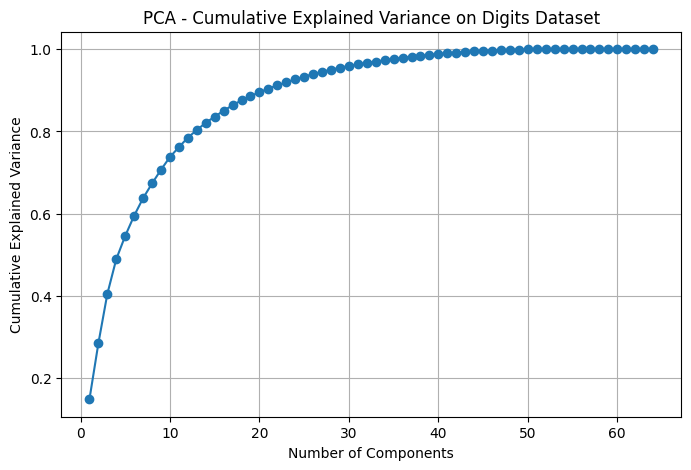

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance on Digits Dataset')
plt.grid(True)
plt.show()


In [8]:
pca_95 = PCA(n_components=0.95)
X_train_pca = pca_95.fit_transform(X_train)
X_test_pca = pca_95.transform(X_test)


In [10]:
print(f"Reduced shape: {X_train_pca.shape} (from 64 → {X_train_pca.shape[1]})")


Reduced shape: (1257, 28) (from 64 → 28)


In [11]:
start = time.time()
clf_pca = LogisticRegression(max_iter=1000)
clf_pca.fit(X_train_pca, y_train)
pca_time = time.time() - start
pca_acc = accuracy_score(y_test, clf_pca.predict(X_test_pca))

In [12]:
print(f"After PCA (95% variance): Accuracy = {pca_acc:.4f}, Training time = {pca_time:.4f}s")


After PCA (95% variance): Accuracy = 0.9611, Training time = 0.1835s


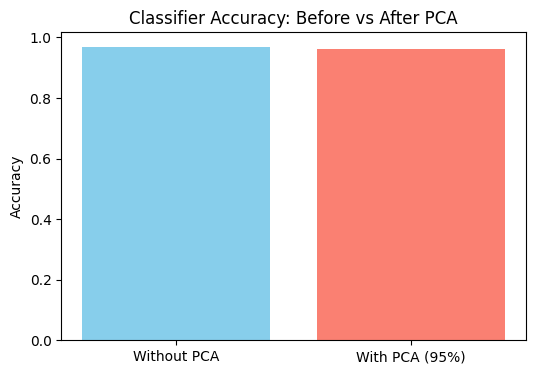

In [13]:
plt.figure(figsize=(6,4))
plt.bar(['Without PCA', 'With PCA (95%)'], [raw_acc, pca_acc], color=['skyblue','salmon'])
plt.title("Classifier Accuracy: Before vs After PCA")
plt.ylabel("Accuracy")
plt.show()